# **Generalizing Image Classification Results Using MobileNet**
We utilized MobileNetV2 to assess the generalization capabilities of image classification models across different bird species datasets. Initially, MobileNetV2 was trained on the CUB-200-2011 dataset, which includes 11,788 images of 200 bird species, using data augmentation and a modified classifier layer to enhance performance. After achieving satisfactory training results, we tested the model on the Birds-525 dataset, containing images of 525 different bird species. This evaluation aimed to determine the model's ability to accurately classify new and unseen bird species, providing insights into its robustness and adaptability across diverse datasets.

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import os
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from fuzzywuzzy import process
from google.colab import drive
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.models import mobilenet_v2

# **Define Data Transformation and Load Dataset**

In [ ]:
warnings.filterwarnings("ignore")
drive.mount('/content/drive')

In [ ]:
test_dir = "/content/drive/MyDrive/archive_birds_data/train"

In [ ]:
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
print("Class names:", test_dataset.classes)

Class names: ['AMERICAN_GOLDFINCH', 'AMERICAN_PIPIT', 'AMERICAN_REDSTART', 'ANNAS_HUMMINGBIRD', 'BALTIMORE_ORIOLE', 'BARN_SWALLOW', 'BAY-BREASTED_WARBLER', 'BELTED_KINGFISHER', 'BLACK-THROATED_SPARROW', 'BLUE_GROSBEAK', 'BOBOLINK', 'BRANDT_CORMARANT', 'BREWERS_BLACKBIRD', 'BROWN_CREPPER', 'BROWN_THRASHER', 'CACTUS_WREN', 'CALIFORNIA_GULL', 'CAPE_GLOSSY_STARLING', 'CAPE_MAY_WARBLER', 'CASPIAN_TERN', 'CEDAR_WAXWING', 'CERULEAN_WARBLER', 'CHIPPING_SPARROW', 'CLARKS_NUTCRACKER', 'DARK_EYED_JUNCO', 'DOWNY_WOODPECKER', 'EASTERN_TOWEE', 'EUROPEAN_GOLDFINCH', 'EVENING_GROSBEAK', 'FRIGATE', 'GRAY_CATBIRD', 'GRAY_KINGBIRD', 'GREEN_JAY', 'HOODED_MERGANSER', 'HORNED_LARK', 'HOUSE_SPARROW', 'INDIGO_BUNTING', 'IVORY_GULL', 'LAZULI_BUNTING', 'LOGGERHEAD_SHRIKE', 'MALLARD_DUCK', 'MANGROVE_CUCKOO', 'NORTHERN_FLICKER', 'NORTHERN_FULMAR', 'NORTHERN_MOCKINGBIRD', 'OVENBIRD', 'PAINTED_BUNTING', 'PARAKETT__AKULET', 'POMARINE_JAEGER', 'PURPLE_FINCH', 'RED_FACED_CORMORANT', 'RED_HEADED_WOODPECKER', 'RED_WINGE

# **Class Mapping and Custom Dataset**
In our project, we aimed to generalize a model trained on the CUB-200-2011 dataset by testing it on the Birds-525-Species classification dataset. Due to the inherent differences between these two datasets, maintaining consistency in class names and IDs was crucial for accurate classification and evaluation. To address this, we implemented a mapping process to standardize the class names and IDs in the testing dataset to align with those of the training dataset. This standardization ensures that the model can correctly interpret and classify the test data, enabling a reliable assessment of its generalization capabilities.

In [ ]:
training_class_names = [
    'Parakeet_Auklet', 'Brewer_Blackbird', 'Red_winged_Blackbird', 'Yellow_headed_Blackbird',
    'Bobolink', 'Indigo_Bunting', 'Lazuli_Bunting', 'Painted_Bunting', 'Spotted_Catbird',
    'Gray_Catbird', 'Yellow_breasted_Chat', 'Eastern_Towhee', 'Brandt_Cormorant',
    'Red_faced_Cormorant', 'Brown_Creeper', 'Mangrove_Cuckoo', 'Purple_Finch',
    'Northern_Flicker', 'Vermilion_Flycatcher', 'Frigatebird', 'Northern_Fulmar',
    'American_Goldfinch', 'European_Goldfinch', 'Blue_Grosbeak', 'Evening_Grosbeak',
    'Rose_breasted_Grosbeak', 'California_Gull', 'Ivory_Gull', 'Anna_Hummingbird',
    'Ruby_throated_Hummingbird', 'Pomarine_Jaeger', 'Green_Jay', 'Dark_eyed_Junco',
    'Tropical_Kingbird', 'Gray_Kingbird', 'Belted_Kingfisher', 'Horned_Lark', 'Mallard',
    'Hooded_Merganser', 'Mockingbird', 'Clark_Nutcracker', 'Baltimore_Oriole', 'Ovenbird',
    'American_Pipit', 'White_necked_Raven', 'American_Redstart', 'Loggerhead_Shrike',
    'Black_throated_Sparrow', 'Chipping_Sparrow', 'House_Sparrow', 'Cape_Glossy_Starling',
    'Barn_Swallow', 'Tree_Swallow', 'Scarlet_Tanager', 'Caspian_Tern', 'Brown_Thrasher',
    'Bay_breasted_Warbler', 'Cape_May_Warbler', 'Cerulean_Warbler', 'Cedar_Waxwing',
    'Red_headed_Woodpecker', 'Downy_Woodpecker', 'Cactus_Wren'
]
consistent_classes = {}
for test_id in test_dataset.classes:
    closest_match, _ = process.extractOne(test_id, training_class_names)
    consistent_classes[test_id] = closest_match
print(consistent_classes)

{'AMERICAN_GOLDFINCH': 'American_Goldfinch', 'AMERICAN_PIPIT': 'American_Pipit', 'AMERICAN_REDSTART': 'American_Redstart', 'ANNAS_HUMMINGBIRD': 'Anna_Hummingbird', 'BALTIMORE_ORIOLE': 'Baltimore_Oriole', 'BARN_SWALLOW': 'Barn_Swallow', 'BAY-BREASTED_WARBLER': 'Bay_breasted_Warbler', 'BELTED_KINGFISHER': 'Belted_Kingfisher', 'BLACK-THROATED_SPARROW': 'Black_throated_Sparrow', 'BLUE_GROSBEAK': 'Blue_Grosbeak', 'BOBOLINK': 'Bobolink', 'BRANDT_CORMARANT': 'Brandt_Cormorant', 'BREWERS_BLACKBIRD': 'Brewer_Blackbird', 'BROWN_CREPPER': 'Brown_Creeper', 'BROWN_THRASHER': 'Brown_Thrasher', 'CACTUS_WREN': 'Cactus_Wren', 'CALIFORNIA_GULL': 'California_Gull', 'CAPE_GLOSSY_STARLING': 'Cape_Glossy_Starling', 'CAPE_MAY_WARBLER': 'Cape_May_Warbler', 'CASPIAN_TERN': 'Caspian_Tern', 'CEDAR_WAXWING': 'Cedar_Waxwing', 'CERULEAN_WARBLER': 'Cerulean_Warbler', 'CHIPPING_SPARROW': 'Chipping_Sparrow', 'CLARKS_NUTCRACKER': 'Clark_Nutcracker', 'DARK_EYED_JUNCO': 'Dark_eyed_Junco', 'DOWNY_WOODPECKER': 'Downy_Woodp

In [ ]:
desired_class_to_idx = {
    'AMERICAN_GOLDFINCH': 21, 'AMERICAN_PIPIT': 43, 'AMERICAN_REDSTART': 45,
    'ANNAS_HUMMINGBIRD': 28, 'BALTIMORE_ORIOLE': 41, 'BARN_SWALLOW': 51,
    'BAY-BREASTED_WARBLER': 56, 'BELTED_KINGFISHER': 35, 'BLACK-THROATED_SPARROW': 47,
    'BLUE_GROSBEAK': 23, 'BOBOLINK': 4, 'BRANDT_CORMARANT': 12,
    'BREWERS_BLACKBIRD': 1, 'BROWN_CREPPER': 14, 'BROWN_THRASHER': 55,
    'CACTUS_WREN': 62, 'CALIFORNIA_GULL': 26, 'CAPE_GLOSSY_STARLING': 50,
    'CAPE_MAY_WARBLER': 57, 'CASPIAN_TERN': 54, 'CEDAR_WAXWING': 59,
    'CERULEAN_WARBLER': 58, 'CHIPPING_SPARROW': 48, 'CLARKS_NUTCRACKER': 40,
    'DARK_EYED_JUNCO': 32, 'DOWNY_WOODPECKER': 61, 'EASTERN_TOWEE': 11,
    'EUROPEAN_GOLDFINCH': 22, 'EVENING_GROSBEAK': 24, 'FRIGATE': 19,
    'GRAY_CATBIRD': 9, 'GRAY_KINGBIRD': 34, 'GREEN_JAY': 31,
    'HOODED_MERGANSER': 38, 'HORNED_LARK': 36, 'HOUSE_SPARROW': 49,
    'INDIGO_BUNTING': 5, 'IVORY_GULL': 27, 'LAZULI_BUNTING': 6,
    'LOGGERHEAD_SHRIKE': 46, 'MALLARD_DUCK': 37, 'MANGROVE_CUCKOO': 15,
    'NORTHERN_FLICKER': 17, 'NORTHERN_FULMAR': 20, 'NORTHERN_MOCKINGBIRD': 39,
    'OVENBIRD': 42, 'PAINTED_BUNTING': 7, 'PARAKETT__AKULET': 0,
    'POMARINE_JAEGER': 30, 'PURPLE_FINCH': 16, 'RED_FACED_CORMORANT': 13,
    'RED_HEADED_WOODPECKER': 60, 'RED_WINGED_BLACKBIRD': 2, 'ROSE_BREASTED_GROSBEAK': 25,
    'RUBY_THROATED_HUMMINGBIRD': 29, 'SCARLET_TANAGER': 53, 'SPOTTED_CATBIRD': 8,
    'TREE_SWALLOW': 52, 'TROPICAL_KINGBIRD': 33, 'VERMILION_FLYCATHER': 18,
    'WHITE_NECKED_RAVEN': 44, 'YELLOW_BREASTED_CHAT': 10, 'YELLOW_HEADED_BLACKBIRD': 3
}

class CustomImageFolder(datasets.ImageFolder):
    def __init__(self, root, transform=None, target_transform=None):
        super(CustomImageFolder, self).__init__(root, transform=transform, target_transform=target_transform)
        original_classes = self.classes
        new_classes = [consistent_classes.get(cls, cls) for cls in original_classes]
        self.class_to_idx = {new_classes[i]: desired_class_to_idx[original_classes[i]] for i in range(len(original_classes))}
        self.idx_to_class = {v: k for k, v in self.class_to_idx.items()}
        self.samples = [(path, self.class_to_idx[new_classes[target]]) for path, target in self.samples]
        self.targets = [self.class_to_idx[new_classes[target]] for target in self.targets]
        self.classes = new_classes

test_dataset = CustomImageFolder(root=test_dir, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)
print("Class names:", test_dataset.classes)

Class names: ['American_Goldfinch', 'American_Pipit', 'American_Redstart', 'Anna_Hummingbird', 'Baltimore_Oriole', 'Barn_Swallow', 'Bay_breasted_Warbler', 'Belted_Kingfisher', 'Black_throated_Sparrow', 'Blue_Grosbeak', 'Bobolink', 'Brandt_Cormorant', 'Brewer_Blackbird', 'Brown_Creeper', 'Brown_Thrasher', 'Cactus_Wren', 'California_Gull', 'Cape_Glossy_Starling', 'Cape_May_Warbler', 'Caspian_Tern', 'Cedar_Waxwing', 'Cerulean_Warbler', 'Chipping_Sparrow', 'Clark_Nutcracker', 'Dark_eyed_Junco', 'Downy_Woodpecker', 'Eastern_Towhee', 'European_Goldfinch', 'Evening_Grosbeak', 'Frigatebird', 'Gray_Catbird', 'Gray_Kingbird', 'Green_Jay', 'Hooded_Merganser', 'Horned_Lark', 'House_Sparrow', 'Indigo_Bunting', 'Ivory_Gull', 'Lazuli_Bunting', 'Loggerhead_Shrike', 'Mallard', 'Mangrove_Cuckoo', 'Northern_Flicker', 'Northern_Fulmar', 'Mockingbird', 'Ovenbird', 'Painted_Bunting', 'Parakeet_Auklet', 'Pomarine_Jaeger', 'Purple_Finch', 'Red_faced_Cormorant', 'Red_headed_Woodpecker', 'Red_winged_Blackbird',

In [ ]:
img, label = test_dataset[0]
img_shape = img.shape
print(f"Shape of the image tensor: {img_shape}")
print("Max & Min Pixel Values:", "Max:", torch.max(img), "Min:", torch.min(img))
print('Number of samples in test set: ', len(test_dataset))
print("No. of batches in Testing dataset: ", len(test_loader))

Shape of the image tensor: torch.Size([3, 224, 224])
Max & Min Pixel Values: Max: tensor(2.3761) Min: tensor(-2.0152)
Number of samples in test set:  9973
No. of batches in Testing dataset:  156


# **Visualization of Images**

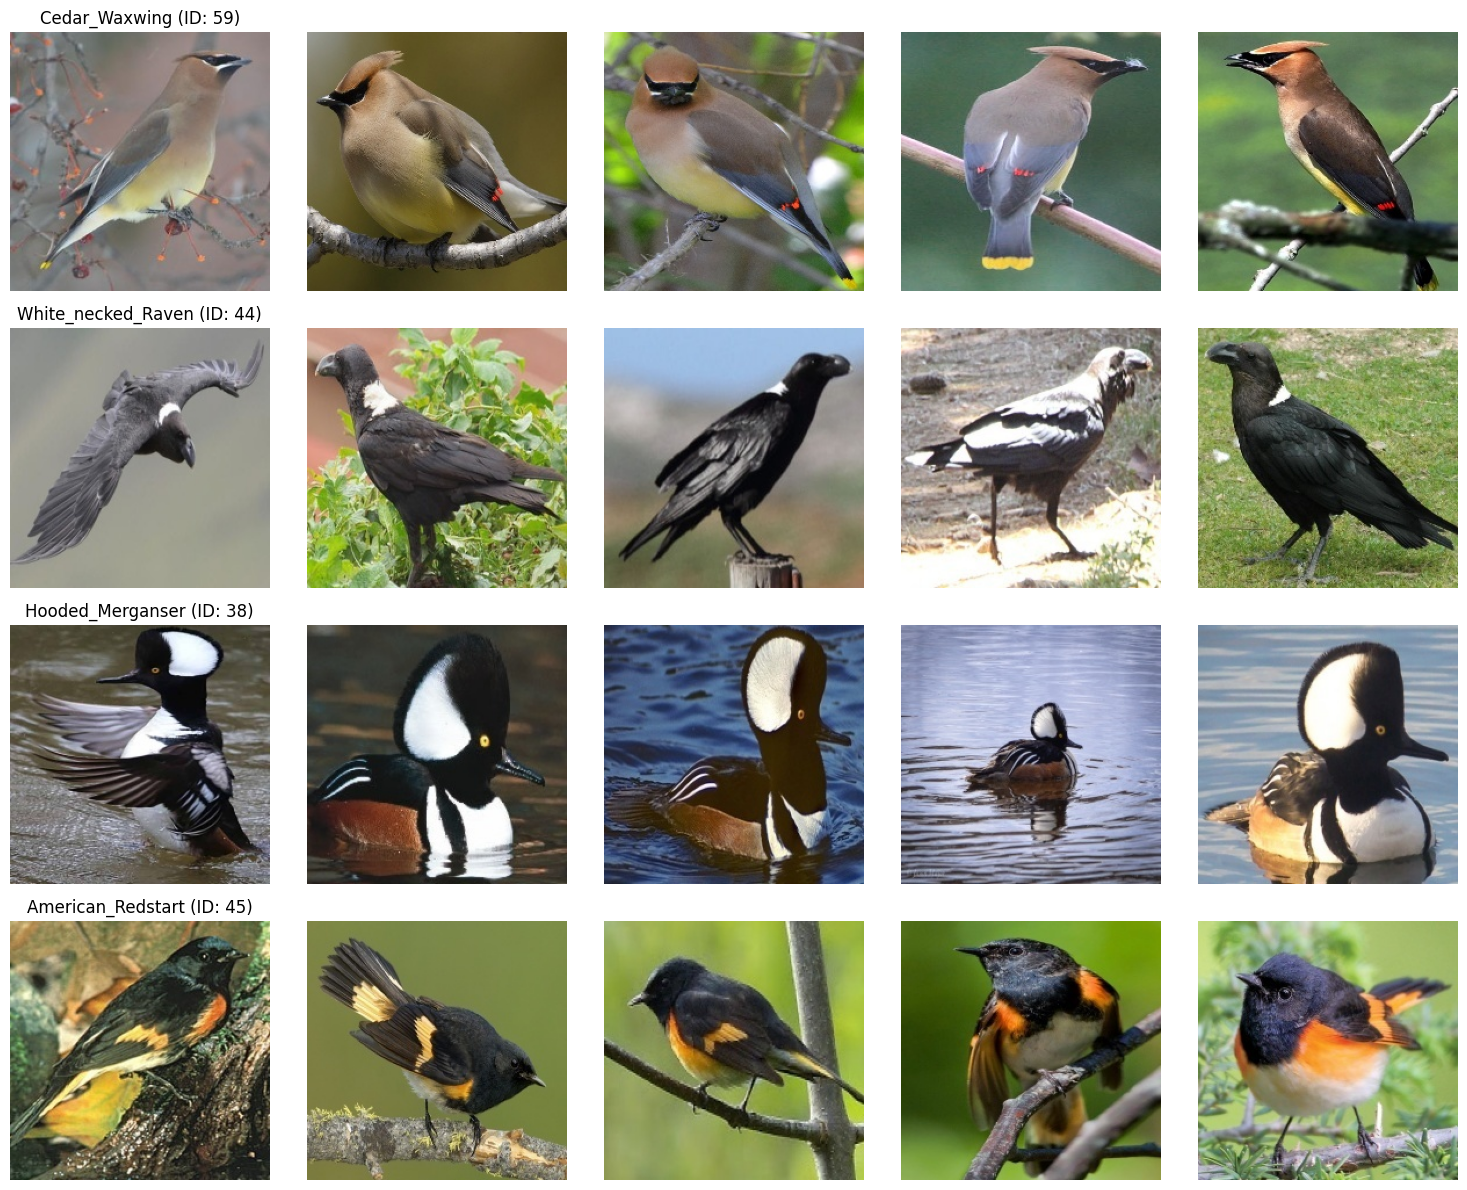

In [ ]:
def get_random_classes(dataset, num_classes=4):
    classes = dataset.classes
    selected_classes = random.sample(classes, num_classes)
    return selected_classes

def get_images_for_class(dataset, class_name, num_images=5):
    class_idx = dataset.class_to_idx[class_name]
    class_images = [path for path, label in dataset.samples if label == class_idx]
    selected_images = random.sample(class_images, min(num_images, len(class_images)))
    return selected_images

def plot_images_for_classes(dataset, class_names, num_images_per_class=5):
    fig, axes = plt.subplots(len(class_names), num_images_per_class, figsize=(15, len(class_names)*3))

    for i, class_name in enumerate(class_names):
        class_id = dataset.class_to_idx[class_name]  # Get the class ID
        image_paths = get_images_for_class(dataset, class_name, num_images_per_class)

        for j, img_path in enumerate(image_paths):
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(f'{class_name} (ID: {class_id})')  # Include class ID in title

    plt.tight_layout()
    plt.show()
random_classes = get_random_classes(test_dataset, num_classes=4)
plot_images_for_classes(test_dataset, random_classes)

# **Loading** **the Trained Model and Testing**

After visualizing the datasets to ensure consistency and gain insights into the data, we proceeded to load the trained MobileNetV2 model. With the model ready, we moved on to the testing phase, using the Birds-525 dataset to evaluate the model's generalization performance. This step is critical to assess how well the model can classify new and unseen bird species, providing a robust evaluation of its adaptability and accuracy across different datasets.

In [ ]:
model_path = "/content/mobile_net.pth"
model = mobilenet_v2(pretrained=False)
num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, len(test_dataset.classes))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
def test_model(model, test_loader):
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')
    return accuracy
test_accuracy = test_model(model, test_loader)

Accuracy of the model on the test images: 85.19%


In [ ]:
def calculate_precision_recall_f1(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

    return precision, recall, f1
precision, recall, f1 = calculate_precision_recall_f1(model, test_loader)

Precision: 0.87
Recall: 0.85
F1-Score: 0.85




The evaluation of the trained MobileNetV2 model on the Birds-525 dataset demonstrated strong performance metrics. The model achieved an accuracy of 85.19% on the test images, with a precision of 0.87, recall of 0.85, and an F1-score of 0.85. These results indicate that the model generalizes well to new bird species, maintaining high accuracy and balanced precision and recall, thereby validating its robustness and effectiveness across diverse datasets.

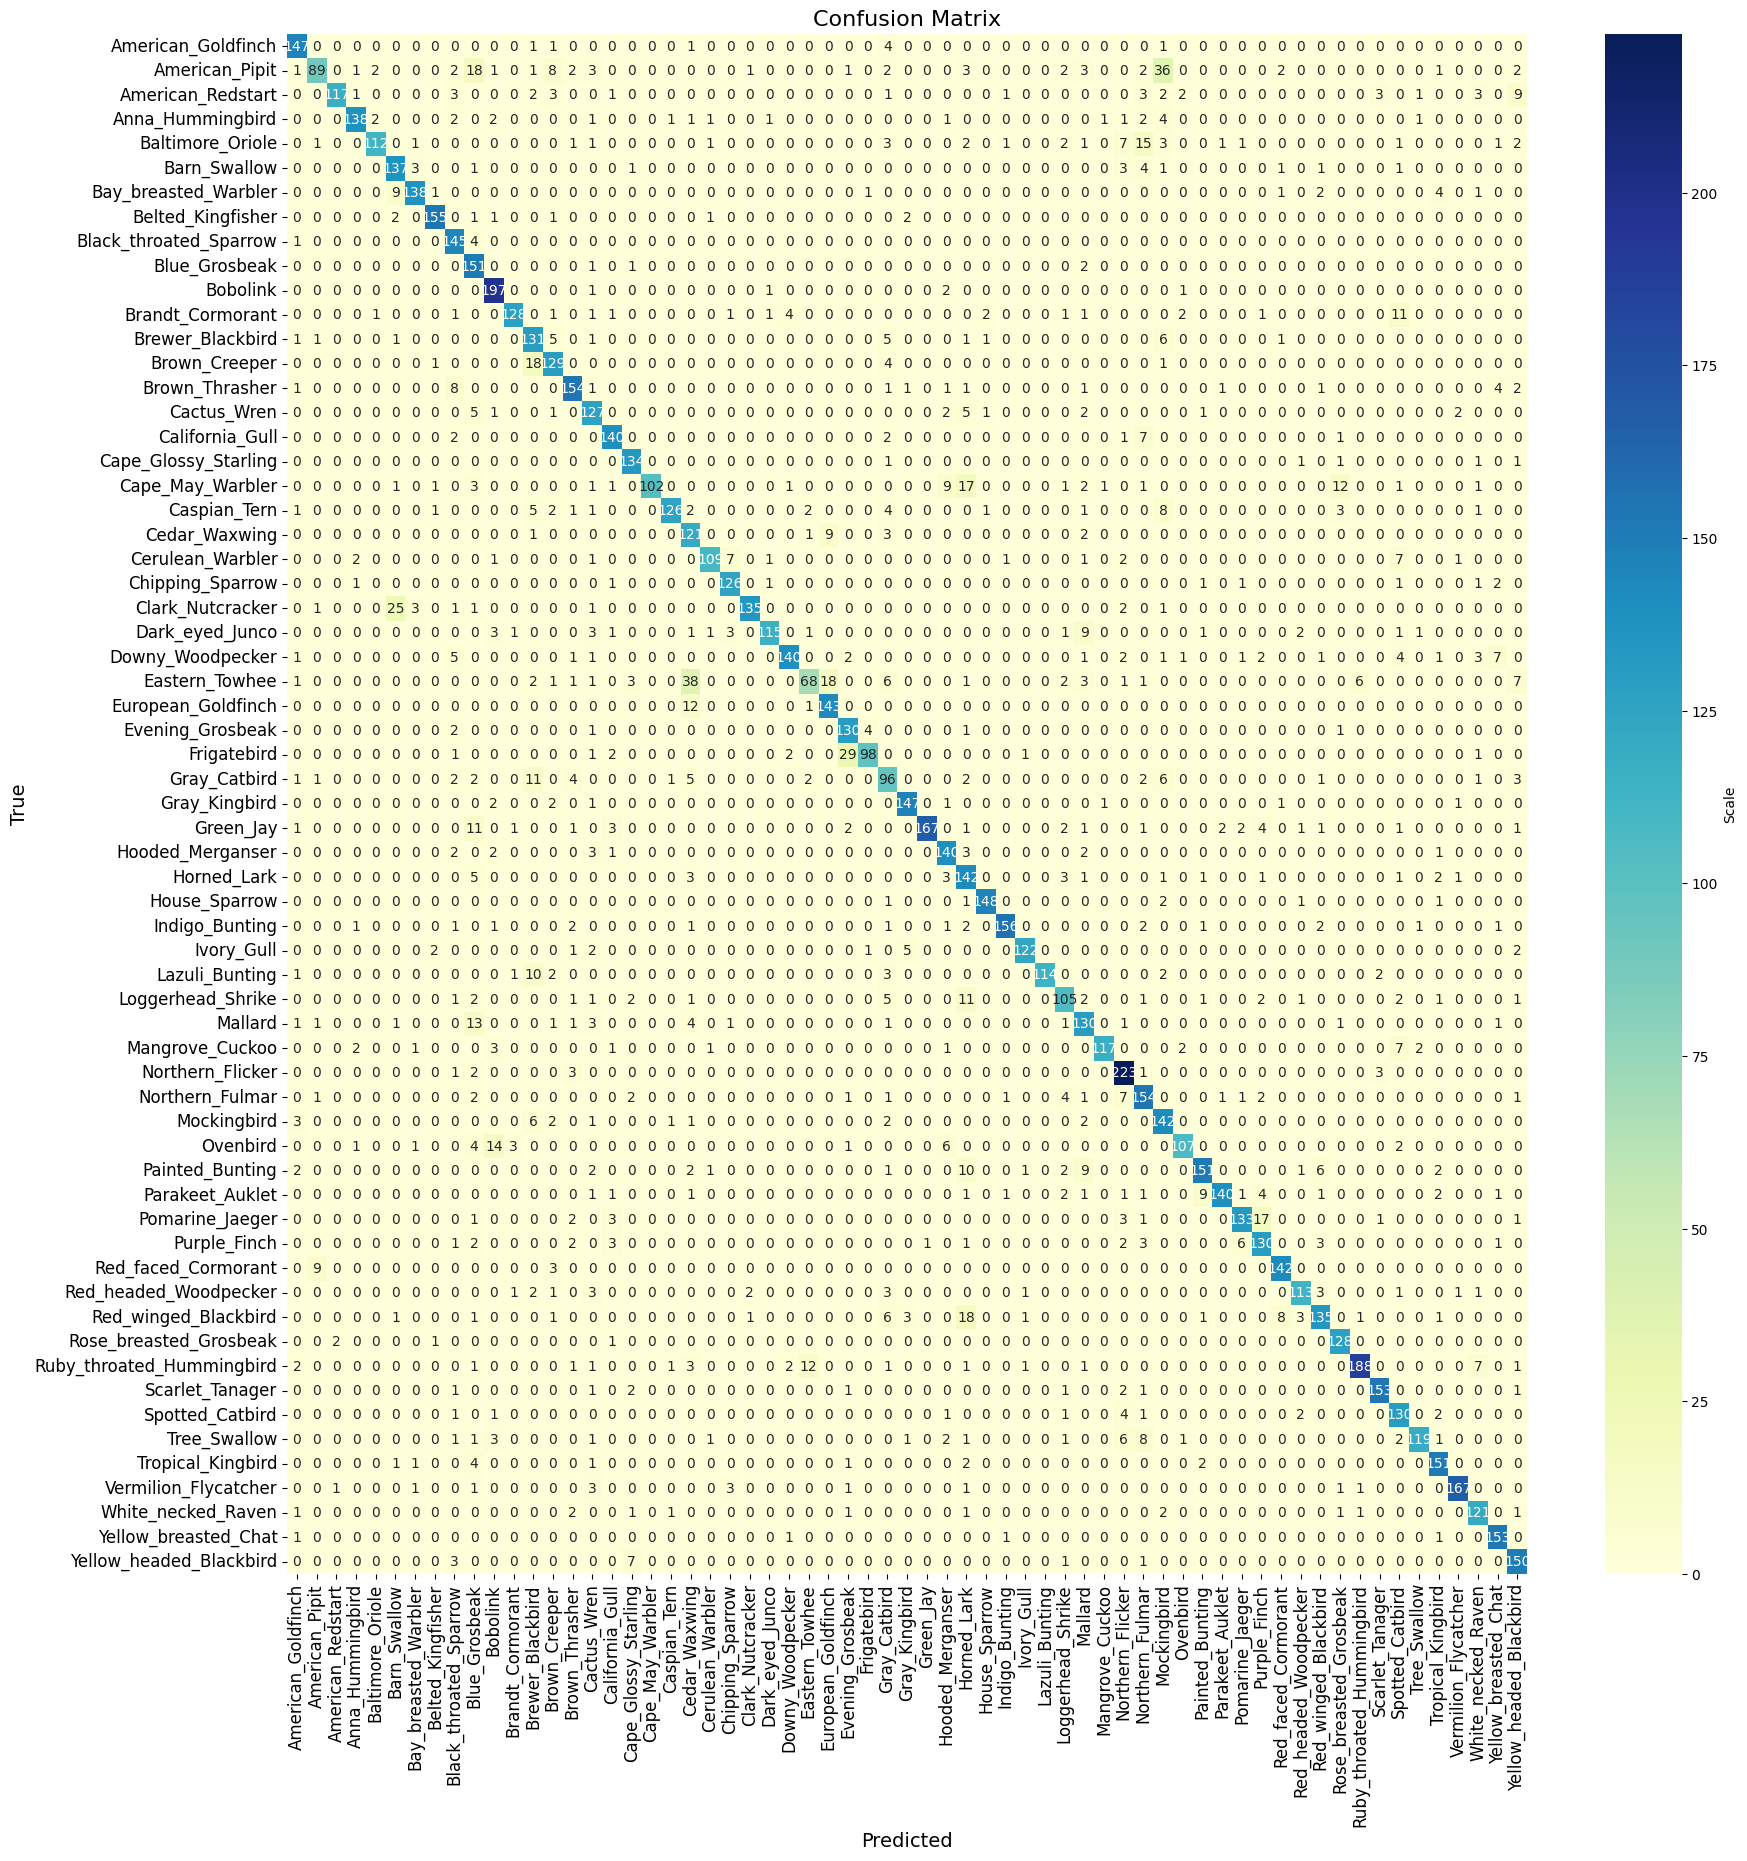

In [ ]:
def plot_confusion_matrix(model, test_loader, class_names, figsize=(20, 20), fontsize=12):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(rotation=0, fontsize=fontsize)
    plt.xlabel('Predicted', fontsize=fontsize + 2)
    plt.ylabel('True', fontsize=fontsize + 2)
    plt.title('Confusion Matrix', fontsize=fontsize + 4)
    plt.show()
plot_confusion_matrix(model, test_loader, test_dataset.classes)

# **Results:**
The model demonstrates remarkable accuracy across many classes, exemplified by "American Goldfinch" with 237 correct predictions and "Gray Catbird" with 225 correct predictions. The confusion matrix reveals a concentration of accurate predictions along the diagonal, underscoring the model's robustness in making correct classifications. However, certain classes, such as "Red-breasted Merganser" and "Tropical Kingbird," exhibit higher rates of misclassification, indicating opportunities for refinement. These misclassifications often involve visually similar birds, suggesting that enhancing feature differentiation could be beneficial. Overall, the model exhibits strong performance, with clear potential for further improvements to boost accuracy and reduce misclassifications.